In [17]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
DRUGS = [
    ("PEMBROLIZUMAB",0),
    ("VASOPRESSIN",1),
    ("AZITHROMYCIN",0),
    ("THIAMINE",0),
    ("PANTOPRAZOLE",0),
    ("FACTOR IX COMPLEX",1)
]

def makeDataPt (name):
    drug, criticality = random.choice(DRUGS)
    if name ==              "Josh":
        if criticality ==   1:
            time = random.random() * 3 + 1
        else:
            time = random.random() * 7 + 1
    else:
        time = random.random() * 9 + 1
        
    result = {
        "cpht": name,
        "drug": drug,
        "crit": criticality,
        "time": time
    }
    return result

In [19]:
Josh = [makeDataPt("Josh") for x in range(100)]
Tiffany = [makeDataPt("Tiffany") for x in range(100)]
Linda = [makeDataPt("Linda") for x in range(100)]

In [20]:
df = pd.DataFrame([*Josh,*Tiffany,*Linda])
profilnine = df[df['drug'] == "FACTOR IX COMPLEX"]
profilnine.head()

vaso = df[df['drug'] == "VASOPRESSIN"].sort_values("time")
vaso.head()

,cpht,drug,crit,time
256,Linda,VASOPRESSIN,1,1.164767
10,Josh,VASOPRESSIN,1,1.568731
67,Josh,VASOPRESSIN,1,1.621159
15,Josh,VASOPRESSIN,1,1.798874
65,Josh,VASOPRESSIN,1,1.966567


### Profil-Nine Time Boxplot

Text(0, 0.5, 'time ($min$)')

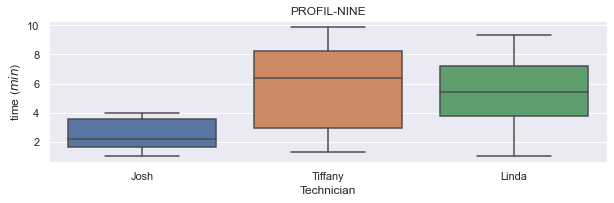

In [21]:
sns.set_style("darkgrid")
sns.set_theme("notebook")
plt.title("PROFIL-NINE")
sns.boxplot (x='cpht',y='time',data=profilnine)
plt.xlabel("Technician")
plt.ylabel("time ($min$)")


### Vasopressin Time Boxplot

Text(0, 0.5, 'time ($min$)')

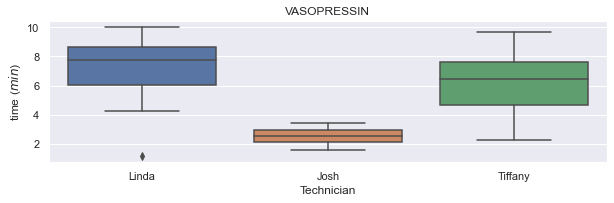

In [22]:
plt.title("VASOPRESSIN")
sns.boxplot(x='cpht',y='time',data=vaso)
plt.xlabel("Technician")
plt.ylabel("time ($min$)")


### Critical vs Routine Time Plot

Text(0, 0.5, 'time ($min$)')

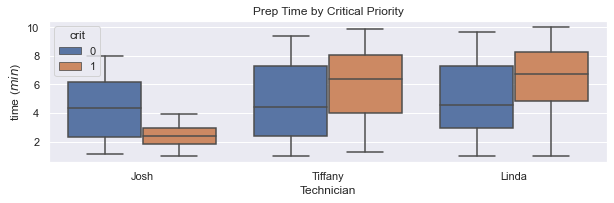

In [23]:
sns.boxplot(x="cpht",y="time",hue="crit",data=df)
plt.title("Prep Time by Critical Priority")
plt.xlabel("Technician")
plt.ylabel("time ($min$)")

[Text(0, 0, 'VASOPRESSIN'),
 Text(1, 0, 'AZITHROMYCIN'),
 Text(2, 0, 'THIAMINE'),
 Text(3, 0, 'PANTOPRAZOLE'),
 Text(4, 0, 'FACTOR IX COMPLEX'),
 Text(5, 0, 'PEMBROLIZUMAB')]

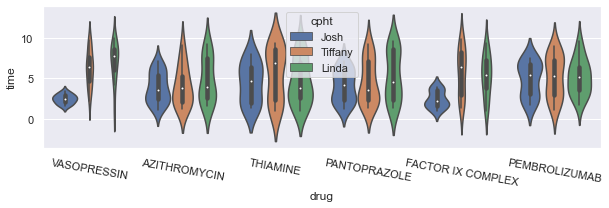

In [24]:
ax = sns.violinplot(x='drug',y='time',hue='cpht',data=df)
ax.set_xticklabels(ax.get_xticklabels() ,rotation=-10)

### Analysis of 1 Tech

#### Josh

In [25]:
df[df['cpht'] == "Josh"]

,cpht,drug,crit,time
0,Josh,VASOPRESSIN,1,2.127410
1,Josh,AZITHROMYCIN,0,2.648303
2,Josh,AZITHROMYCIN,0,2.341364
3,Josh,AZITHROMYCIN,0,2.472712
4,Josh,THIAMINE,0,6.351380
...,...,...,...,...
95,Josh,PEMBROLIZUMAB,0,1.976557
96,Josh,AZITHROMYCIN,0,6.348205
97,Josh,VASOPRESSIN,1,2.580145
98,Josh,AZITHROMYCIN,0,3.602325


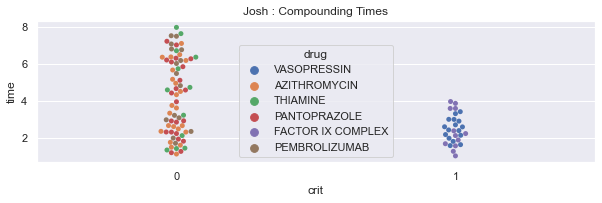

In [26]:
from matplotlib import rcParams

sns.swarmplot(x="crit", y="time",hue="drug",data=df[df['cpht']=="Josh"])
#plt.legend([],[],frameon=False)
# figure size in inches
plt.title("Josh : Compounding Times")
rcParams['figure.figsize'] = 10, 2.6

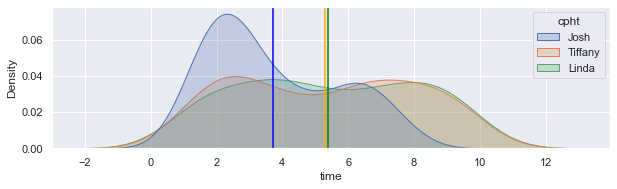

In [27]:
sns.kdeplot(x='time',data=df,shade=True,hue='cpht')
plt.axvline(x=df[df['cpht']=="Josh"].time.mean(), color="blue")
plt.axvline(x=df[df['cpht']=="Tiffany"].time.mean(), color="orange")
plt.axvline(x=df[df['cpht']=="Linda"].time.mean(), color="green")

#### Linda

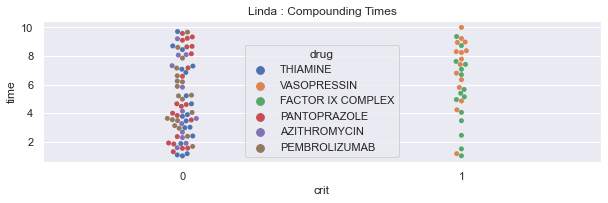

In [28]:
sns.swarmplot(x="crit", y="time",hue="drug",data=df[df['cpht']=="Linda"])
#plt.legend([],[],frameon=False)
# figure size in inches
plt.title("Linda : Compounding Times")
rcParams['figure.figsize'] = 10, 2.6

<AxesSubplot:xlabel='time', ylabel='Density'>

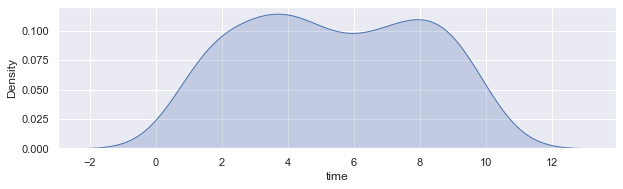

In [29]:
sns.kdeplot(x='time',data=df[df['cpht']=="Linda"],shade=True)